|Voice Recognition, Authentication|

In [5]:
import json
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import precision_recall_fscore_support

In [6]:
# Open the JSON file
with open("./Pre_processing/auth.json") as f:
  # Load the JSON data into a Python dictionary
  data = json.load(f)

# Now you can work with the data as a dictionary
print(data)



{'mappings': [], 'labels_gender': [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1], 'labels_ID': ['810102087', '810102087', '810102087', '810103226', '810103226', '810103226', '810102263', '810102263', '810102263', '810103123', '810103123', '810103123', '810199459', '810199459', '810199459', '810199489', '810199489', '810199489'], 'MFCCs': [[-430.1700134277344, 95.19310760498047, 15.731851577758789, -5.766305923461914, -28.448272705078125, 4.670502185821533, -10.1474609375, -17.29994010925293, -19.412208557128906, 7.535068988800049, -16.52044677734375, -10.58482551574707, -11.245108604431152], [-430.1700134277344, 95.19310760498047, 15.731851577758789, -5.766305923461914, -28.448272705078125, 4.670502185821533, -10.1474609375, -17.29994010925293, -19.412208557128906, 7.535068988800049, -16.52044677734375, -10.58482551574707, -11.245108604431152], [-430.1700134277344, 95.19310760498047, 15.731851577758789, -5.766305923461914, -28.448272705078125, 4.670502185821533, -10.1474609375,

KNN

X_train shape: (13, 13)
y_train shape: (13,)
X_test shape: (5, 13)
y_test shape: (5,)
[[-3.07878693e+02  3.85406990e+01  3.41178398e+01  2.98112035e+00
   5.86067915e+00  3.78247690e+00 -4.61202478e+00  5.84958220e+00
  -4.21827602e+00 -1.49719274e+00 -4.52201080e+00 -3.21110368e+00
   3.06889248e+00]
 [-4.30170013e+02  9.51931076e+01  1.57318516e+01 -5.76630592e+00
  -2.84482727e+01  4.67050219e+00 -1.01474609e+01 -1.72999401e+01
  -1.94122086e+01  7.53506899e+00 -1.65204468e+01 -1.05848255e+01
  -1.12451086e+01]
 [-6.69826782e+02  7.55632858e+01 -1.29766502e+01  2.55138531e+01
   1.55638523e+01  1.75161514e+01 -1.31923313e+01  3.70197821e+00
  -7.82833385e+00  1.23730831e+01 -5.40126753e+00 -1.07412024e+01
  -1.08796790e-01]
 [-6.69826782e+02  7.55632858e+01 -1.29766502e+01  2.55138531e+01
   1.55638523e+01  1.75161514e+01 -1.31923313e+01  3.70197821e+00
  -7.82833385e+00  1.23730831e+01 -5.40126753e+00 -1.07412024e+01
  -1.08796790e-01]
 [-5.11584290e+02  6.39954338e+01 -8.92330742e

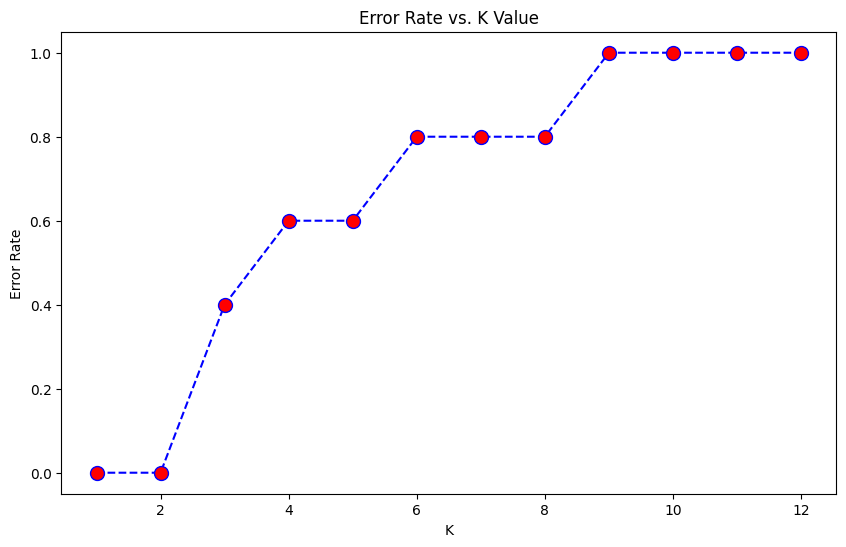

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data["MFCCs"], 
                                               data["labels_ID"], random_state=0)

X_train = np.array(X_train)
X_test= np.array(X_test)
y_train = np.array(y_train )
y_test = np.array(y_test)

print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))


#Checking the accuracy of model for k=1
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("Test score for k=1: " + str(round((knn.score(X_test,y_test)*100), 4)) + '%')

#Using elbow method to find a good value of 'k' and thus improve the accuracy of the model
error_rate = []


for k in range(1,13):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred_k = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_k != y_test))
error = min(error_rate)
print("error: ", error)
#plotting error_rate vs k
plt.figure(figsize=(10,6))
plt.plot(range(1,13), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


#from the graph it is clear that the optimum value of k occurs when the error is minimum
#so the value k = 1 will give maximum accuracy
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("Test score for k=1: " + str(round((knn.score(X_test,y_test)*100), 4)) + '%')


In [4]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

print("Logistic Regression")
print("Accuracy on training set: {:.3f}".format(logit.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logit.score(X_test, y_test)))

y_pred_logit = logit.predict(X_test)
print("Predicted value: ",y_pred_logit)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_logit, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Logistic Regression
Accuracy on training set: 1.000
Accuracy on test set: 0.750
Predicted value:  ['810202047' '810102087' '810199570' '810199459' '810199459' '810600097'
 '810600088' '810600133' '810103226' '810102263' '810102263' '810199459']
Precision, Recall and fscore: 0.75 0.75 0.75


d:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
#Train decision tree model


tree = DecisionTreeClassifier(random_state=0,max_depth=4)
tree.fit(X_train, y_train)

print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

y_pred_tree = tree.predict(X_test)
print("Predicted value: ",y_pred_tree)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_tree, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

#data is small in volume and thus predictions are not precise

Decision Tree
Accuracy on training set: 0.923
Accuracy on test set: 0.600
Predicted value:  ['810102087' '810199459' '810199459' '810103123' '810199459']
Precision, Recall and fscore: 0.6 0.6 0.6


In [11]:
#SVM

#Train support vector machine model

svm = SVC()
svm.fit(X_train, y_train)

print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

y_pred_sm = svm.predict(X_test)
print("Predicted value: ",y_pred_sm)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_sm, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Support Vector Machine
Accuracy on training set: 0.462
Accuracy on test set: 0.000
Predicted value:  ['810103226' '810199489' '810199489' '810199489' '810199489']
Precision, Recall and fscore: 0.0 0.0 0.0
